## Cropping into patches with minimal repeating and full image coverage

In [ ]:
from matplotlib.image import imread

In [54]:
# as an example I used the photo of Great Horned Owl. © Patricia Velte 
owl_img = imread('examples/owl.jpg')

In [55]:
owl_img.shape

(839, 679, 3)

In [37]:
def get_patch_indexes(img_size, patch_size):
    patches_n = img_size / patch_size
    remainder = img_size % patch_size
    
    # get list of full patches
    indexes = list(range(0, int(patches_n)))
    
    # last patch will start from the end of previous and to the end of the image
    if remainder:
        indexes.append(patches_n - 1)
    
    return [int(i * patch_size) for i in indexes]

In [38]:
get_patch_indexes(10, 3)

[0, 3, 6, 7]

In [39]:
get_patch_indexes(10, 5)

[0, 5]

In [40]:
get_patch_indexes(12, 4)

[0, 4, 8]

In [41]:
get_patch_indexes(13, 5)

[0, 5, 8]

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [45]:
def extract_patches(src_img, patch_size):
    img_height = src_img.shape[0]
    img_width = src_img.shape[1]

    h_indexes = get_patch_indexes(img_height, patch_size)
    w_indexes = get_patch_indexes(img_width, patch_size)

    patches = np.zeros((len(h_indexes), len(w_indexes)), dtype=object)

    for h_i, h in enumerate(h_indexes):    
        for w_i, w in enumerate(w_indexes):
            patch = src_img[h : h+patch_size, w : w+patch_size, :]

            patches[h_i, w_i] = patch
    
    return patches

In [47]:
patches = extract_patches(owl_img, patch_size=200)
patches.shape

(5, 4)

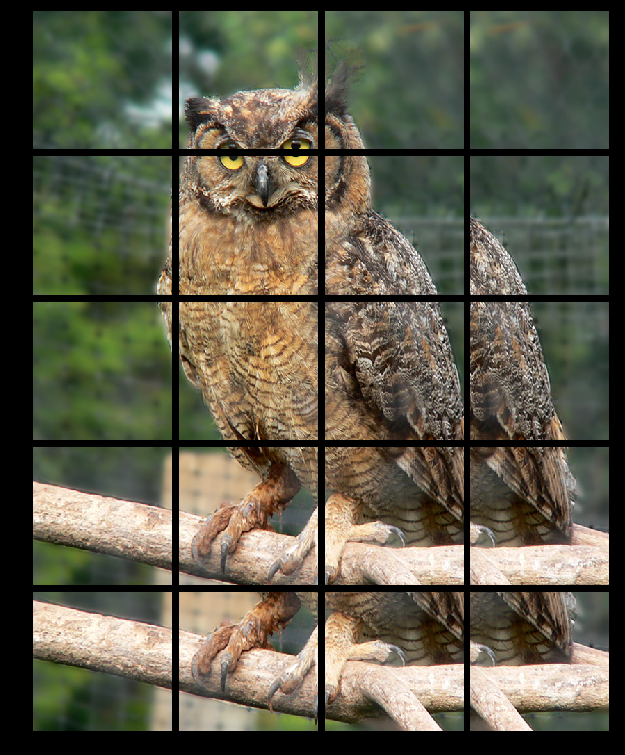

In [49]:
fig, img_plots = plt.subplots(*patches.shape, figsize=(8, 10), gridspec_kw = {'wspace':0.05, 'hspace':0.05})

fig.patch.set_facecolor('black')

for i in range(0, patches.shape[0]):    
    for j in range(0, patches.shape[1]):
        img_plt = img_plots[i, j]
        
        img_plt.imshow(patches[i, j])        
        img_plt.axis('off')
        
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

In [50]:
patches = extract_patches(owl_img, patch_size=300)
patches.shape

(3, 3)

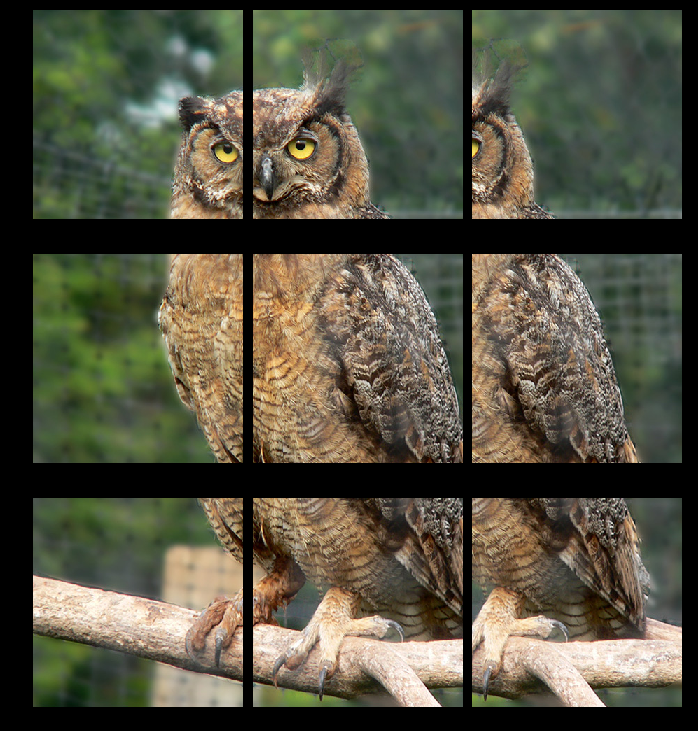

In [52]:
fig, img_plots = plt.subplots(*patches.shape, figsize=(9, 10), gridspec_kw = {'wspace':0.05, 'hspace':0.05})

fig.patch.set_facecolor('black')

for i in range(0, patches.shape[0]):    
    for j in range(0, patches.shape[1]):
        img_plt = img_plots[i, j]
        
        img_plt.imshow(patches[i, j])        
        img_plt.axis('off')
        
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

## Generating list of patches with IDs

In [73]:
def get_patches_ids(patches, id_prefix = ''):
    ids = []
    
    for i in range(0, patches.shape[0]):    
        for j in range(0, patches.shape[1]):
            ids.append(f'{id_prefix}_{i}_{j}')
    
    return patches.flatten(), ids

In [74]:
patches_list, ids = get_patches_ids(patches, 'test')

In [75]:
ids

['test_0_0',
 'test_0_1',
 'test_0_2',
 'test_1_0',
 'test_1_1',
 'test_1_2',
 'test_2_0',
 'test_2_1',
 'test_2_2']

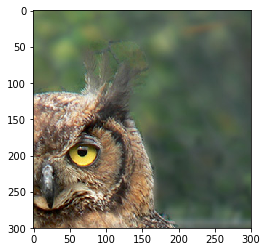

In [71]:
plt.imshow(patches_list[1])

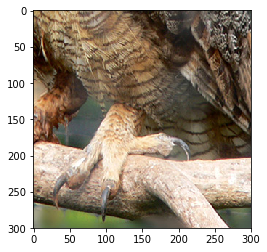

In [72]:
plt.imshow(patches_list[7])